# Classification of Medical Specialties using Medical Transcriptions

#### Student names:
Meltem Kaya - 21827555
Safiye Tüfekçi - 2210356157






**1.Abstract**

**2.Introduction**

**3.Problem**

**4.Data Understanding**

&ensp;4.1.Dataset Description

&ensp;4.2.Dataset Details

&ensp;4.3.Distribution of Medical Specialities

&ensp;4.4.Missing Values

&ensp;4.5.Duplicate Values

&ensp;4.6.Word Counts

&ensp;4.7.Most Common Words

&ensp;&ensp;4.7.1.Before Removing Stop Words

&ensp;&ensp;4.7.2.After Removing Stop Words

**5.Data Preparation**

&ensp;5.1.General Cleaning

&ensp;&ensp;5.1.1.Dropping Unrelated Columns

&ensp;&ensp;5.1.2.Handling Missing Values

&ensp;5.2.Text Normalization

&ensp;&ensp;5.2.1.Upper/Lowercase Conversion

&ensp;&ensp;5.2.2.Removing Punctutation and Numerical Values

&ensp;&ensp;5.2.3.Tokenization

&ensp;5.3.Stemming  

&ensp;5.4.Removing Stop Words

&ensp;5.5.Dropping Unused Columns

&ensp;5.6.Create Encoded Target

**6.Modeling**

&ensp;6.1.Model Selection

&ensp;6.2.Undersampled Dataset

&ensp;&ensp;6.2.1.Random Forest Classifier

&ensp;&ensp;6.2.2.K-Nearest Neighbor(KNN) Classification

&ensp;&ensp;6.2.3.Decision Tree

&ensp;6.3.Stratified Sampling

&ensp;&ensp;6.3.1.Random Forest Classifier

&ensp;&ensp;6.3.2.K-Nearest Neighbor(KNN) Classification

&ensp;&ensp;6.3.3.Decision Tree

**7.Evaluation**

&ensp;7.1.UnderSampled Results

&ensp;7.2.Stratified Results

&ensp;7.3.Conclusion

**8.References**








##Abstract
The availability of public datasets is one of the main obstacles preventing the implementation of many current NLP techniques in clinical settings. In this work, we propose a dataset <a href="#reference1">**[1]**</a> that contains medical transcription samples that have been carefully selected for categorizing medical specialties and created for pre-training in natural language comprehension in the medical domain. On this dataset, we pre-trained a number of models and empirically shown that which model gives the best result.

##Introduction
Because of the private nature of medical records, there are few large-scale, publicly available medical text datasets that are suitable for pretraining models, and real-world, private datasets are often small-scale and imbalanced. As a result, one of the biggest challenge in building deep learning based NLP systems for biomedical corpora is the availability of public datasets (Wang et al., 2018).

In this work, we will use a dataset which is a big collection of transcribed medical reports.These sample reports are being offered by different users and transcriptionists. We will analyze the dataset and use for training models then evaluating and comparing the results.

## Problem <a class="anchor" id="problem"></a>
A disease has many symptoms.
Diagnosing the disease with these symptoms is the domain of doctors, not patients. However, it is the patient's responsibility to apply to the right medical field in order to receive correct and fast treatment.When there are multiple medical specialties, it is difficult for people.
  According to google trends, in the last 12 months, 2672 people have googled "what is cardiology", 3592 people have googled "what is gastroenterology" in Turkey. Even for such a basic science, people have to do research.

  As a result, the main problem is people who do not have sufficient medical knowledge have difficulty in choosing the medical specialty to apply for the medical problems they face.

## Data Understanding<a class="anchor" id="data_understanding"></a>


### Dataset Description
The dataset consists of **4999 rows** and **6 columns**. One of the columns is unnamed which shows the index of the row. Apart from that, there are **5 variables** which are:

**description :** Short description of transcription.

**medical_specialty :** Indicates the medical specialty classification of transcription. A medical specialty refers to a branch of medical practice that is focused on diseases.

**sample_name :** Transcription title.

**transcription :** Sample medical transcriptions provided by various transcriptionists.

**keywords :** Relevant keywords obtained from transcription.


In this dataset, there are **1 numeric**, **5 categorical-nominal** variables. The unnamed variable is numeric, all remaining variables are categorical-nominal.


The dataset is accessible on kaggle and data is originated from https://mtsamples.com/index.asp.





### Dataset Details




Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Below, the first 5 rows of dataset is visualized. The first column which is unnamed is not necessary for our machine learning model. In other columns, there are upper/lowercase words, punctuation and stopwords. We will handle these all in preparation step to enhance the performance of our machine learning model.



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSCP/data.csv')
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


### Distribution of Medical Specialities

Below, a quick plot of the distribution of each labels, that is, how many transcription in total belongs to which kind of medical speciality.

Well...The dataset contains some distributional biases. There is a clear imbalance between medical specialities. **"Surgery"** appears 22.1% and much more often than others. 18 of 40 labels are less than %1.

<img src= "https://drive.google.com/uc?id=1lL6inns3V7WexkE_rmXmKyFSuAbEelHa">


### Missing Values
Below, details of dataset are visualized.
There are **4999 rows** and **6 columns**.

There are null values in ***transcription*** and ***keywords*** columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB



As shown in the statistics below, 1068 of 4999 rows are missing in column ***keywords***. As it is shown in pie chart, %21.4 of column ***keywords*** is missing. Because of the large amount of missing values in this column, dropping this column is a must.

33 of 4999 rows are missing in column ***transcription*** . As it is shown in pie chart, %0.7 of column ***transcription*** is missing. Since less than %1 of transcription column is missing, rows which contains missing values will be dropped in the data preparation step.


In [ ]:
# to identify the null values by descending order
print(df.isnull().sum().sort_values(ascending = False) , "\n")

# to print data shape
print(f'Number of rows: {df.shape[0]}\nNumber of columns:{df.shape[1]}')

keywords             1068
transcription          33
Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
dtype: int64 

Number of rows: 4999
Number of columns:6


<img src= "https://drive.google.com/uc?id=1-1ND0WWoxuph1ZBTpVSWp-wUPUC_9zWv">


### Duplicate Values
When we look at the medical specialty and transcription pairs, we see only 4 duplicated data.


In [ ]:
duplicates = df[df['transcription'].notnull()]
duplicates = duplicates[duplicates.duplicated(subset=['transcription','medical_specialty'], keep=False)]
print(duplicates[['medical_specialty','transcription']])
print("\nNumber of Duplicates for Medical Speciality-Transcription Pairs: " , duplicates[['medical_specialty','transcription']].shape[0])

     medical_specialty                                      transcription
1949   Pain Management                                        OPERATION:,
1964   Pain Management  POST PROCEDURE INSTRUCTIONS:, The patient has ...
1994   Pain Management                                        OPERATION:,
2009   Pain Management  POST PROCEDURE INSTRUCTIONS:, The patient has ...

Number of Duplicates for Medical Speciality-Transcription Pairs:  4


Now, here is where it gets interesting. As shown below, there are 2641 duplicated value in column ***transcription***. A little above we got result that there are only 4 duplicated Medical Specialty-Transcription pairs.

To make an inference here, there are 2637 duplicated transcriptions and their medical specialties are different from each other. This disambiguity is an important factor that will reduce the success of any model.

In [ ]:
duplicated = df[df['transcription'].duplicated()]
print(duplicated[['medical_specialty','transcription']].head(),"\n")
print("Number of duplicates in column 'transcription': ", duplicated.shape[0])


    medical_specialty                                      transcription
116           Urology                                                NaN
196           Surgery  PROCEDURE: , Elective male sterilization via b...
197           Surgery  PREOPERATIVE DIAGNOSIS:,  Desire for sterility...
201           Surgery  DIAGNOSIS:,  Desires vasectomy.,NAME OF OPERAT...
202           Surgery  DESCRIPTION:,  The patient was placed in the s... 

Number of duplicates in column 'transcription':  2641


A horror movie here.. No words for this scene. Everything is clear.

<img src= "https://drive.google.com/uc?id=1-3E_MOeVNpyzBeU0rIOnQosiRKh8t51K">


Below, the distribution of duplicated 'transcription' values are visualized. Almost 50% of the duplicated values ​​belong to 'Consult-History and Phy.', 'Cardiovascular/Pulmonary' and 'Orthopedic'.

<img src= "https://drive.google.com/uc?id=1-3NlMLV4baMi6NZm0wePSWS6JpbjcoS0">

####The Distribution of Medical Specialites without Duplicates
As expected, after removing duplicated values in transcription column, there is still an imbalance between medical specialities.

<img src= "https://drive.google.com/uc?id=1SsFHKe7FpPo8SDn9mmLd3EnAG7VPaI78">


###Word Counts
After removing punctuation and upper/lowercase, The distribution of word counts for transcriptions are shown below. The First boxplot visualizes word counts of transcription before removing stop words. The second boxplot visualizes word counts of transcription after removing stop words. There are outliers in both plots. Average word count is more than 500 before removing stop words and less than 250 after removing stop words.

<img src= "https://drive.google.com/uc?id=1-73RJIiaMh5CfFLUlXDDDnX6Wr0_3HCH">


###Most Common Words

####Before Removing Stop Words
Here is the distribution of 50 most common words in 'transcription' column before removing stop words. Other words except 7 words, that are 'patient', 'right','left', 'history', 'normal', 'procedure', 'placed' are stop words.

<img src= "https://drive.google.com/uc?id=1-7Yot0yM_NJrXpF-_B3hng9z45f7izdz">


####After Removing Stop Words
Here is the distribution of 50 most common words in 'transcription' column after removing stop words. The word 'patient' is obviously occuring more frequently than the others in transcriptions.

<img src= "https://drive.google.com/uc?id=1-DQ_-YpUEycKxhKOaQqPBUMLpJ-ESnuv">


##Data Preparation

###General Cleaning

#### Dropping Unrelated Columns

Since there is no information related to model in the column ***Unnamed: 0***, it is dropped.

In [ ]:
df.drop('Unnamed: 0',inplace=True,axis=1)

Since the column ***description*** is the short version of the column ***transcription***, it will not be used and must be dropped.

In [ ]:
df.drop('description', axis=1,inplace=True)

The column ***sample_name*** contains diseases names, but this project deals with disease symptoms and their related medical fields. Hence, this column is out of the concept and must be dropped.

In [ ]:
df.drop('sample_name',axis=1,inplace=True)

The column ***keywords*** must be dropped, because the significant part of this column is full with null values. Also related keywords will be handled with tokenization and stemming methods later.

In [ ]:
df.drop('keywords',axis=1,inplace=True)

Now, there are only two columns left.

In [ ]:
df.head()

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...


#### Handling Missing Values
There are some less amount of data contains null values in column ***transcription*** To get rid of them, the rows which contains null values are dropped.

In [ ]:
df.dropna(axis=0,inplace=True)

####Removing Duplicates
Duplicate values are removed to enhance model result.

In [ ]:
df.drop_duplicates(subset="transcription",
                     keep='first', inplace=True)

###Text Normalization

####Upper/Lowercase Conversion
First, all ***transcriptions*** are converted to lowercase.

In [ ]:
def lower(df, attribute):
    df.loc[:,attribute] = df[attribute].apply(lambda x : str.lower(x))
    return df
df = lower(df,'transcription')
df.head(3)

,medical_specialty,transcription
0,Allergy / Immunology,"subjective:, this 23-year-old white female pr..."
1,Bariatrics,"past medical history:, he has difficulty climb..."
2,Bariatrics,"history of present illness: , i have seen abc ..."


#### Removing Punctuation and Numerical Values
Punctuation and numbers are insignificant in the text, so they should be removed.

In [ ]:
import warnings
import re
warnings.filterwarnings('ignore')
def remove_punc_num(df, attribute):
    df.loc[:,attribute] = df[attribute].apply(lambda x : " ".join(re.findall('[\w]+',x)))
    df[attribute] = df[attribute].str.replace('\d+', '')
    return df
df =remove_punc_num(df, 'transcription')
df_no_punc =df.copy()
df.head(3)

,medical_specialty,transcription
0,Allergy / Immunology,subjective this year old white female present...
1,Bariatrics,past medical history he has difficulty climbin...
2,Bariatrics,history of present illness i have seen abc tod...


#### Tokenization
Tokenization helps creating keywords. A new column which is named 'tokenised' is created to keep this tokens. That is why texts are divided into smaller components called tokens.

In [ ]:
from nltk.tokenize import WhitespaceTokenizer
tk =WhitespaceTokenizer()
def tokenise(df, attribute):
    df['tokenised'] = df.apply(lambda row: tk.tokenize(str(row[attribute])), axis=1)
    return df
df =tokenise(df, 'transcription')
df_experiment =df.copy()
df.head(3)

,medical_specialty,transcription,tokenised
0,Allergy / Immunology,subjective this year old white female present...,"[subjective, this, year, old, white, female, p..."
1,Bariatrics,past medical history he has difficulty climbin...,"[past, medical, history, he, has, difficulty, ..."
2,Bariatrics,history of present illness i have seen abc tod...,"[history, of, present, illness, i, have, seen,..."


####Stemming
An NLP method called stemming basically involves taking a word's suffix off and degrading to its root term. To store stemmed data, a new column, 'stemmed', is created.

In [ ]:
from nltk.stem.snowball import SnowballStemmer
def stemming(df, attribute):
    stemmer = SnowballStemmer("english")
    df['stemmed'] = df[attribute].apply(lambda x: [stemmer.stem(y) for y in x])
    return df
df =stemming(df_experiment, 'tokenised')
df.head(3)

,medical_specialty,transcription,tokenised,stemmed
0,Allergy / Immunology,subjective this year old white female present...,"[subjective, this, year, old, white, female, p...","[subject, this, year, old, white, femal, prese..."
1,Bariatrics,past medical history he has difficulty climbin...,"[past, medical, history, he, has, difficulty, ...","[past, medic, histori, he, has, difficulti, cl..."
2,Bariatrics,history of present illness i have seen abc tod...,"[history, of, present, illness, i, have, seen,...","[histori, of, present, ill, i, have, seen, abc..."


####Removing Stop Words
Due to the high frequency of using stop words, the stop words should be removed in order not to affect classifier performance. A new column can be created and named as 'stemmed_without_stop' to store normalized data.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stop_words(df, attribute):
    stop = stopwords.words('english')
    df['stemmed_without_stop'] = df[attribute].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))
    return df
df = remove_stop_words(df, 'stemmed')
df.head(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,medical_specialty,transcription,tokenised,stemmed,stemmed_without_stop
0,Allergy / Immunology,subjective this year old white female present...,"[subjective, this, year, old, white, female, p...","[subject, this, year, old, white, femal, prese...",subject year old white femal present complaint...
1,Bariatrics,past medical history he has difficulty climbin...,"[past, medical, history, he, has, difficulty, ...","[past, medic, histori, he, has, difficulti, cl...",past medic histori difficulti climb stair diff...
2,Bariatrics,history of present illness i have seen abc tod...,"[history, of, present, illness, i, have, seen,...","[histori, of, present, ill, i, have, seen, abc...",histori present ill seen abc today veri pleasa...


###Creating Undersampled Dataset
Undersampling is a way of dealing with imbalanced datasets. To reduce the number of 'Surgery' and 'Radiology' specialities, we will pick a subset from these according to average word counts. This dataset will be used for evaluating the model on the undersampled dataset.

In [ ]:
df["len_without_stop"] = df['stemmed_without_stop'].apply(lambda words: len(words.split(" ")))
data_surgery = df[df.medical_specialty==" Surgery"]
data_surgery = pd.concat([data_surgery[data_surgery.len_without_stop < 240],data_surgery[data_surgery.len_without_stop>320]])


data_radiology = df[df.medical_specialty==" Radiology"]

data_radiology = pd.concat([data_radiology[data_radiology.len_without_stop < 100],data_radiology[data_radiology.len_without_stop>350]])

data_radiology.drop("len_without_stop", axis=1, inplace = True)
data_surgery.drop("len_without_stop", axis=1, inplace = True)
df.drop("len_without_stop", axis=1, inplace = True)

df_undersampled = df[~df['transcription'].isin(data_radiology.transcription)]
df_undersampled = df[~df['transcription'].isin(data_surgery.transcription)]
df

,medical_specialty,transcription,tokenised,stemmed,stemmed_without_stop
0,Allergy / Immunology,subjective this year old white female present...,"[subjective, this, year, old, white, female, p...","[subject, this, year, old, white, femal, prese...",subject year old white femal present complaint...
1,Bariatrics,past medical history he has difficulty climbin...,"[past, medical, history, he, has, difficulty, ...","[past, medic, histori, he, has, difficulti, cl...",past medic histori difficulti climb stair diff...
2,Bariatrics,history of present illness i have seen abc tod...,"[history, of, present, illness, i, have, seen,...","[histori, of, present, ill, i, have, seen, abc...",histori present ill seen abc today veri pleasa...
3,Cardiovascular / Pulmonary,d m mode left atrial enlargement with left a...,"[d, m, mode, left, atrial, enlargement, with, ...","[d, m, mode, left, atrial, enlarg, with, left,...",mode left atrial enlarg left atrial diamet cm ...
4,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"[the, left, ventricular, cavity, size, and, wa...","[the, left, ventricular, caviti, size, and, wa...",left ventricular caviti size wall thick appear...
...,...,...,...,...,...
4987,Autopsy,anatomical summary sharp force wound of neck ...,"[anatomical, summary, sharp, force, wound, of,...","[anatom, summari, sharp, forc, wound, of, neck...",anatom summari sharp forc wound neck left side...
4988,Autopsy,external examination summary the body is prese...,"[external, examination, summary, the, body, is...","[extern, examin, summari, the, bodi, is, prese...",extern examin summari bodi present black bodi ...
4990,Autopsy,external examination the body is that of a in...,"[external, examination, the, body, is, that, o...","[extern, examin, the, bodi, is, that, of, a, i...",extern examin bodi inch pound white femal appe...
4991,Autopsy,external examination the autopsy is begun at ...,"[external, examination, the, autopsy, is, begu...","[extern, examin, the, autopsi, is, begun, at, ...",extern examin autopsi begun may bodi present b...


###Dropping Unused Columns
The columns ***tokenised*** and ***stemmed*** are created for normalizing the data and will not be used anymore.

In [ ]:
df.drop(['stemmed', 'tokenised'], axis=1,inplace=True)
df_undersampled.drop(['stemmed', 'tokenised'], axis=1,inplace=True)
df_undersampled

,medical_specialty,transcription,stemmed_without_stop
0,Allergy / Immunology,subjective this year old white female present...,subject year old white femal present complaint...
1,Bariatrics,past medical history he has difficulty climbin...,past medic histori difficulti climb stair diff...
2,Bariatrics,history of present illness i have seen abc tod...,histori present ill seen abc today veri pleasa...
3,Cardiovascular / Pulmonary,d m mode left atrial enlargement with left a...,mode left atrial enlarg left atrial diamet cm ...
4,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,left ventricular caviti size wall thick appear...
...,...,...,...
4987,Autopsy,anatomical summary sharp force wound of neck ...,anatom summari sharp forc wound neck left side...
4988,Autopsy,external examination summary the body is prese...,extern examin summari bodi present black bodi ...
4990,Autopsy,external examination the body is that of a in...,extern examin bodi inch pound white femal appe...
4991,Autopsy,external examination the autopsy is begun at ...,extern examin autopsi begun may bodi present b...


The column ***transcription*** will be dropped because it has been already normalized and stored in the column  ***stemmed_without_stop***.

In [ ]:
df.drop('transcription',axis =1 ,inplace=True)
df_undersampled.drop('transcription',axis =1 ,inplace=True)
df_undersampled

,medical_specialty,stemmed_without_stop
0,Allergy / Immunology,subject year old white femal present complaint...
1,Bariatrics,past medic histori difficulti climb stair diff...
2,Bariatrics,histori present ill seen abc today veri pleasa...
3,Cardiovascular / Pulmonary,mode left atrial enlarg left atrial diamet cm ...
4,Cardiovascular / Pulmonary,left ventricular caviti size wall thick appear...
...,...,...
4987,Autopsy,anatom summari sharp forc wound neck left side...
4988,Autopsy,extern examin summari bodi present black bodi ...
4990,Autopsy,extern examin bodi inch pound white femal appe...
4991,Autopsy,extern examin autopsi begun may bodi present b...


### Create Encoded Target
String variables can be converted into categorical numeric variables for making easier the modelling step.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['medical_specialty'])
df['encoded_target'] = le.transform(df['medical_specialty'])

#Undersampled
le.fit(df_undersampled['medical_specialty'])
df_undersampled['encoded_target'] = le.transform(df_undersampled['medical_specialty'])
df_undersampled


,medical_specialty,stemmed_without_stop,encoded_target
0,Allergy / Immunology,subject year old white femal present complaint...,0
1,Bariatrics,past medic histori difficulti climb stair diff...,2
2,Bariatrics,histori present ill seen abc today veri pleasa...,2
3,Cardiovascular / Pulmonary,mode left atrial enlarg left atrial diamet cm ...,3
4,Cardiovascular / Pulmonary,left ventricular caviti size wall thick appear...,3
...,...,...,...
4987,Autopsy,anatom summari sharp forc wound neck left side...,1
4988,Autopsy,extern examin summari bodi present black bodi ...,1
4990,Autopsy,extern examin bodi inch pound white femal appe...,1
4991,Autopsy,extern examin autopsi begun may bodi present b...,1


After the normalization, the final state is as follows.

In [ ]:
df.head()

,medical_specialty,stemmed_without_stop,encoded_target
0,Allergy / Immunology,subject year old white femal present complaint...,0
1,Bariatrics,past medic histori difficulti climb stair diff...,2
2,Bariatrics,histori present ill seen abc today veri pleasa...,2
3,Cardiovascular / Pulmonary,mode left atrial enlarg left atrial diamet cm ...,3
4,Cardiovascular / Pulmonary,left ventricular caviti size wall thick appear...,3


# Modeling

##Model Selection

Since size of the dataset, after data preparation is reduced by more than half, in this project KNN model are preferred instead of  Neural Network.

Inference time of in the model is a other important factor. Decision Tree and KNN models are very efficent in that area. On the other hand working time of Random Forest are significantly longer than these models.


In this project, **DecisionTree**, **KNeighborsClassifier**, **Random Forest Classifier** models, which are among the most common artificial intelligence models, are applied.

To appy these models , other one of the  most common techniques which is **N-gram** is used.
  N-gram is a collection of n words. There are many techniques for converting text from an unstructured format to a structured one, and N-gram is one of them. As shown the below,there are many types of n-gram. Different n-grams should be tested on the data to decide with confidence which one works best in the NLP project. In addition to these, N-gram modeling can also be used for different artificial intelligence models.

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from tqdm import tqdm
from sklearn.svm import SVC
from keras.models import Sequential

from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

## Undersampled Dataset

Undersampling is a balancing technique in which samples are removed from the over-represented category until the categoricies have an equal distribution of data.

Its implementation is relatively easy ,and because of reduction of amount of traning data,  it can improve the model’s run-time and compute costs.

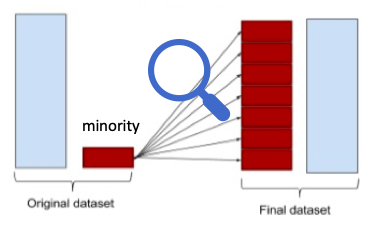

In [ ]:
# function to flatten one list
def flat_list(unflat_list):
    flatted = [item for sublist in unflat_list for item in sublist]
    return flatted

def to_list(df, attribute):
    # Select the normalised transcript column
    df_transcription = df[[attribute]]
    # To convert the attribute into list format, but it has inner list. So it cannot put into the CountVectoriser
    unflat_list_transcription = df_transcription.values.tolist()
    # Let's use back the function defined above, "flat_list", to flatten the list
    flat_list_transcription = flat_list(unflat_list_transcription)
    return flat_list_transcription
flat_list_transcription = to_list(df_undersampled, 'stemmed_without_stop')


In [ ]:
n_gram_features ={'unigram':(1,1),'unigram_bigram':(1,2),'bigram':(2,2),\
       'bigram_trigram':(2,3),'trigram':(3,3)}
feature_name=[]
temp=[]
for key, values in n_gram_features.items():
    temp.append(key)
    feature_name.append(key)
temp

['unigram', 'unigram_bigram', 'bigram', 'bigram_trigram', 'trigram']

In [ ]:
def generate_n_gram_features(flat_list_transcription):
    temp=[]
    for key, values in n_gram_features.items():
        vectorizer = CountVectorizer(ngram_range=values)
        vectorizer.fit(flat_list_transcription)
        temp.append(vectorizer.transform(flat_list_transcription))
    return temp
temp = generate_n_gram_features(flat_list_transcription)

In [ ]:
dataframes = {'unigram':temp[0],
              'unigram_bigram':temp[1],
              'bigram':temp[2],
              'bigram_trigram':temp[3],
              'trigram':temp[4]}
feature_vector = [] ; feature_vector_shape = []
for key in dataframes:
    feature_vector.append(key)
    feature_vector_shape.append(dataframes[key].shape)

n_gram_df = pd.DataFrame({'N-Gram Feature Vector':feature_vector, 'Data Dimension':feature_vector_shape})
n_gram_df

,N-Gram Feature Vector,Data Dimension
0,unigram,"(1547, 12558)"
1,unigram_bigram,"(1547, 216627)"
2,bigram,"(1547, 204069)"
3,bigram_trigram,"(1547, 527029)"
4,trigram,"(1547, 322960)"


In [ ]:
dataframes['unigram']

<1547x12558 sparse matrix of type '<class 'numpy.int64'>'
	with 257451 stored elements in Compressed Sparse Row format>

### Random Forest Classifier

On randomly chosen data samples, random forests generate decision trees, obtain predictions from each tree, and choose for the best option. Additionally, it offers a fairly accurate indicator of the feature's importance.

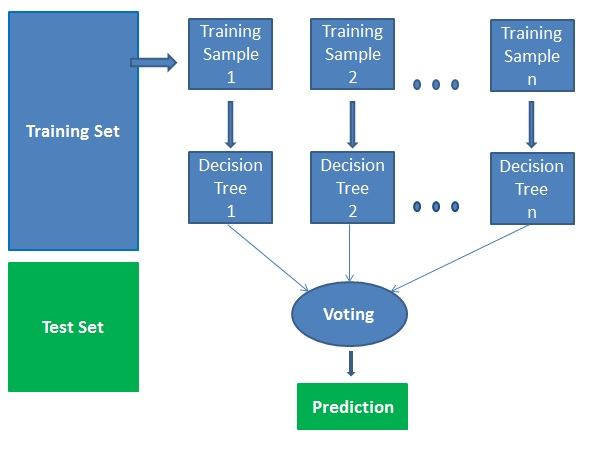

Because so many different decision trees take part in the process, random forests is regarded as a highly precise and reliable technique.
  It is not affected by the overfitting issue. The biases are eliminated mostly because it takes the average of all the predictions.

  On the other hand, because random forests use various decision trees, they produce predictions slowly. Each time it makes a prediction, every tree in the forest must vote on it after making a prediction for the same input. The entire procedure takes time.

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')
random_state_number =8888
df_target =df_undersampled[['encoded_target']].values.ravel()

In [ ]:
metrics = {
    'f1':[f1_score, 'f1_macro'],
    'precision': [precision_score, 'precision_macro'],
    'recall': [recall_score, 'recall_macro']
}

# get evaluation result

def get_performance(param_grid, base_estimator, dataframes):
    df_name_list =[]; best_estimator_list=[]; best_score_list=[]; test_predict_result_list=[];
    metric_list = [];

    for df_name, df in dataframes.items():

        X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.2, shuffle =True,random_state=random_state_number)
        for _, metric_dict in metrics.items():
            sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5, scoring=metric_dict[1],random_state=random_state_number,
                                      factor=2).fit(X_train, y_train)

            best_estimator = sh.best_estimator_
            clf = best_estimator.fit(X_train, y_train)
            prediction = clf.predict(X_test)
            test_predict_result = metric_dict[0](y_test, prediction, average='macro')

            df_name_list.append(df_name) ; best_estimator_list.append(best_estimator) ;
            best_score_list.append(sh.best_score_) ;
            test_predict_result_list.append(test_predict_result) ;metric_list.append(metric_dict[1])


    model_result = pd.DataFrame({'Vector':df_name_list,'Metric':metric_list,
                               'Calibrated Estimator':best_estimator_list,
                               'Best CV Metric Score':best_score_list, 'Test Predict Metric Score': test_predict_result_list})
    return model_result

In [ ]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib
import matplotlib.pyplot as plt
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import os

def vis_classification(filename, vector_type = 'unigram', estimator = KNeighborsClassifier(n_neighbors=9)):
    pca = PCA(n_components=2)
    df1 = pca.fit_transform(dataframes[vector_type].todense())
    X_train, X_test, y_train, y_test = train_test_split(df1, df_target, test_size=0.2, random_state=random_state_number)

    # get training set
    df2 = pd.DataFrame({'pca1':X_train[:,1], 'pca2': X_train[:,0], 'y':le.inverse_transform(y_train)})
    min_1, max_1 = df2['pca1'].min(), df2['pca1'].max()
    min_2, max_2 = df2['pca2'].min(), df2['pca2'].max()

    # generate dimension reduced, but extended data
    pca1_range = np.linspace(min_1,max_1,30)
    pca2_range = np.linspace(min_2,max_2,30)

    # shuffle
    np.random.shuffle(pca1_range) ; np.random.shuffle(pca2_range)

    # to dataframe
    prediction_test = pd.DataFrame({'pca1':pca1_range, 'pca2':pca2_range})

    best_estimator = estimator

    # fit training set and predict extended data
    clf = best_estimator.fit(X_train, y_train)

    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))
    cmap = plt.cm.get_cmap('tab10', 4)
    fig.suptitle(f"Visualising {type(estimator).__name__} on {vector_type.capitalize()} Vector", fontsize=14,fontweight='bold')


    def plot_scatter(ax, predictor_set, target, title):

        # plot area classifier
        clf = best_estimator.fit(X_train, y_train)
        axs[0].tricontourf(X_train[:,0], X_train[:,1], clf.predict(X_train), levels=np.arange(-0.5, 4), zorder=10, alpha=0.3, cmap=cmap, edgecolors="k")

        axs[1].tricontourf(X_test[:,0], X_test[:,1], clf.predict(X_test), levels=np.arange(-0.5, 4), zorder=10, alpha=0.3, cmap=cmap, edgecolors="k")

        # plot scatter
        df3 = pd.DataFrame({'pca1':predictor_set[:,1], 'pca2': predictor_set[:,0], 'y':le.inverse_transform(target)})
        for y_label in df3['y'].unique():
            df_filter = df3[df3['y']==y_label]
            ax.scatter(df_filter['pca1'], df_filter['pca2'], alpha=1,label=f"{y_label}")
        ax.legend()
        ax.set_title(f'{title} ({predictor_set.shape[0]} Samples)',fontweight='bold')
    plot_scatter(axs[0], X_train, y_train, 'Training Set')
    plot_scatter(axs[1], X_test, y_test, 'Testing Set')
    #axs[0].sharey(axs[1])
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/DSCP/plots/'+filename+'.png', bbox_inches='tight')
    return plt.show()


In [ ]:
param_grid = {'max_depth': [None,30,32,35,37,38,39,40],'min_samples_split': [2,150,170,180,190,200]}
base_estimator = RandomForestClassifier(random_state=random_state_number)
rfc_result = get_performance(param_grid, base_estimator, dataframes)
rfc_result

,Vector,Metric,Calibrated Estimator,Best CV Metric Score,Test Predict Metric Score
0,unigram,f1_macro,"(DecisionTreeClassifier(max_depth=30, max_feat...",0.775593,0.841753
1,unigram,precision_macro,"(DecisionTreeClassifier(max_depth=30, max_feat...",0.806880,0.854276
2,unigram,recall_macro,"(DecisionTreeClassifier(max_depth=30, max_feat...",0.792469,0.844343
3,unigram_bigram,f1_macro,"(DecisionTreeClassifier(max_depth=39, max_feat...",0.773278,0.815614
4,unigram_bigram,precision_macro,"(DecisionTreeClassifier(max_depth=39, max_feat...",0.807513,0.836147
5,unigram_bigram,recall_macro,"(DecisionTreeClassifier(max_depth=39, max_feat...",0.790287,0.825427
6,bigram,f1_macro,"(DecisionTreeClassifier(max_depth=32, max_feat...",0.657741,0.747396
7,bigram,precision_macro,"(DecisionTreeClassifier(max_depth=32, max_feat...",0.762306,0.808537
8,bigram,recall_macro,"(DecisionTreeClassifier(max_depth=32, max_feat...",0.691205,0.761717
9,bigram_trigram,f1_macro,"(DecisionTreeClassifier(max_depth=39, max_feat...",0.626466,0.678209


In [ ]:
def get_best_vector_clf(knn_result):

    temp = knn_result[knn_result['Metric'] =='f1_macro']
    temp2 = temp.iloc[temp['Best CV Metric Score'].idxmax()].to_frame().T
    best_vector = temp2['Vector'].values[0]
    best_clf = temp2['Calibrated Estimator'].values[0]

    return best_vector, best_clf

best_vector, best_clf =  get_best_vector_clf(rfc_result)
vis_classification('rfc', vector_type = best_vector, estimator = best_clf)

In [ ]:
df_temp = rfc_result[rfc_result['Metric'] =='f1_macro']
# df_temp['Calibrated Estimator']
vector_rfc = df_temp[['Vector','Calibrated Estimator']].set_index('Vector').to_dict()['Calibrated Estimator']
vector_rfc

In [ ]:
supported_columns_dict = {}
for df_name, df in dataframes.items():
    X_train, X_test, y_train, y_test = train_test_split(dataframes[df_name], df_target, test_size=0.2, random_state=random_state_number)

    selector = SelectFromModel(estimator=vector_rfc[df_name]).fit(X_train, y_train)

    filter_columns = selector.get_support()
    dataframes[df_name] = dataframes[df_name][:, filter_columns]

shape_dim = [] ; df_names = []
for df_name, df in dataframes.items():
    shape_dim.append(df.shape)
    df_names.append(df_name)
n_gram_df_dim = pd.DataFrame({'N-Gram Feature Vector':df_names, 'Data Dimension':shape_dim})
n_gram_df_dim

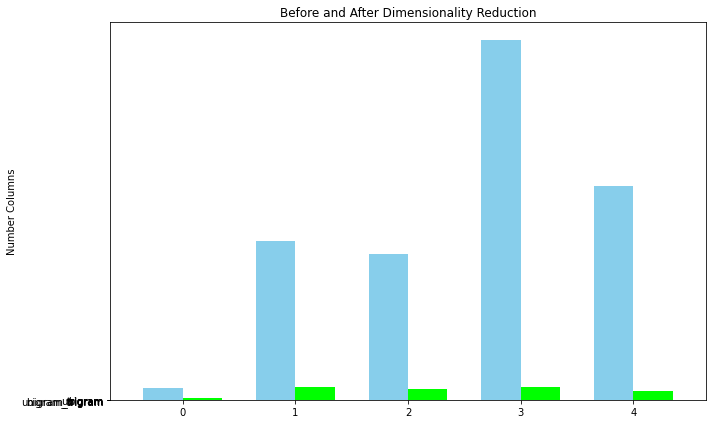

In [ ]:
labels = n_gram_df_dim['N-Gram Feature Vector'].values
b4 = [shape[1] for shape in n_gram_df['Data Dimension'].values]
af = [shape[1] for shape in n_gram_df_dim['Data Dimension'].values]

x = np.arange(len(labels))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, b4, width, label='Before Dimensionality Reduction', color='skyblue')
rects2 = ax.bar(x + width/2, af, width, label='After Dimensionality Reduction', color='lime')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number Columns')
ax.set_title('Before and After Dimensionality Reduction')
ax.bar(x,labels)
#ax.set_xticks(x, labels)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/DSCP/plots/before_and_after_dimensionality_reduction.png', bbox_inches='tight')
plt.show()


### K-Nearest Neighbor (KNN) Classification

KNN is a non-parametric and lazy supervised algorithm. Lazy algorithm means it saves all the training data and uses the whole training set for classification or prediction insted of  not explicitly learning the model.
  

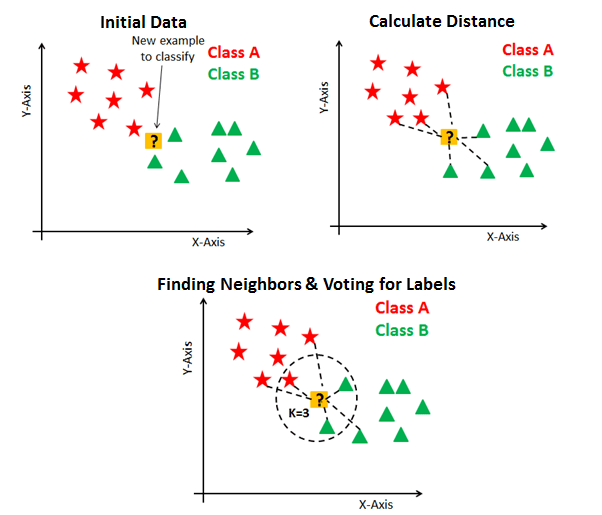

In KNN, the training process is very fast, it just saves all the values from the data set.In contrast, there is the huge memory consumption because of storing all the data and time complexity at testing time.

In [ ]:
param_grid = {'n_neighbors': [5,7,9,11,13,15,17,19,21]}
base_estimator = KNeighborsClassifier()
knn_result = get_performance(param_grid, base_estimator, dataframes)
knn_result

,Vector,Metric,Calibrated Estimator,Best CV Metric Score,Test Predict Metric Score
0,unigram,f1_macro,KNeighborsClassifier(),0.563097,0.586187
1,unigram,precision_macro,KNeighborsClassifier(),0.655027,0.649989
2,unigram,recall_macro,KNeighborsClassifier(n_neighbors=21),0.560800,0.536622
3,unigram_bigram,f1_macro,KNeighborsClassifier(n_neighbors=9),0.538443,0.567388
4,unigram_bigram,precision_macro,KNeighborsClassifier(),0.656673,0.618038
5,unigram_bigram,recall_macro,KNeighborsClassifier(n_neighbors=9),0.579013,0.586822
6,bigram,f1_macro,KNeighborsClassifier(),0.312341,0.368195
7,bigram,precision_macro,KNeighborsClassifier(),0.643790,0.620986
8,bigram,recall_macro,KNeighborsClassifier(),0.357744,0.408195
9,bigram_trigram,f1_macro,KNeighborsClassifier(),0.306842,0.312144


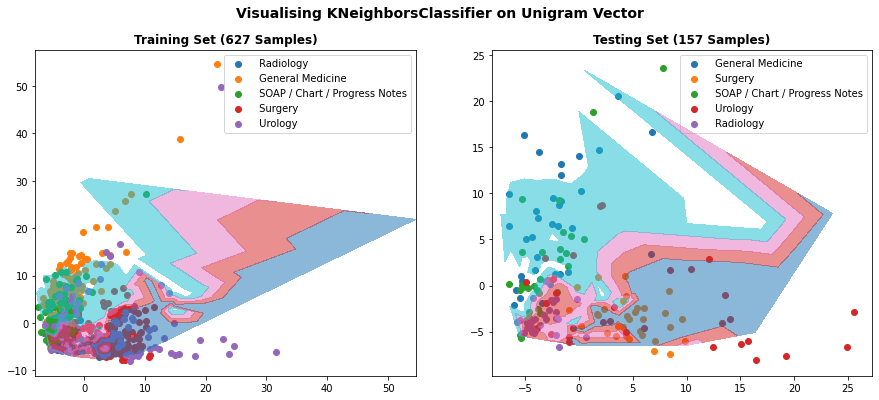

In [ ]:
best_vector, best_clf =  get_best_vector_clf(knn_result)
vis_classification('knn', vector_type = best_vector, estimator = best_clf)

### Decision Tree

One of the simplest and most commonly used classification techniques is the decision tree. Working mechanism of decision tree is simply asking a question and based on the answer YES or NO and spliting the tree into subtress

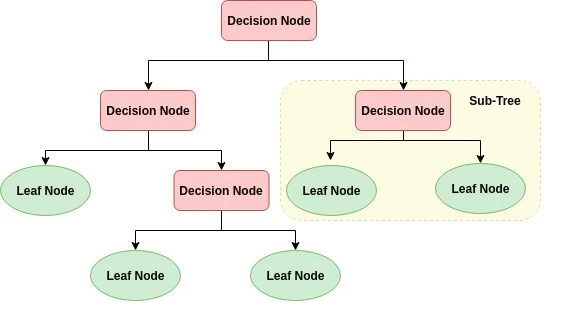

In [ ]:
param_grid = {'max_depth': [None,4,6,7,8,30,32,35],'min_samples_split': [2,3,4,5,35,10,16,20]}
base_estimator = DecisionTreeClassifier(random_state=random_state_number)
dtc_result = get_performance(param_grid, base_estimator, dataframes,'dtc')
dtc_result

,Vector,Metric,Calibrated Estimator,Best CV Metric Score,Test Predict Metric Score
0,unigram,f1_macro,"DecisionTreeClassifier(max_depth=32, random_st...",0.661223,0.752024
1,unigram,precision_macro,"DecisionTreeClassifier(max_depth=7, random_sta...",0.684612,0.772437
2,unigram,recall_macro,"DecisionTreeClassifier(max_depth=30, random_st...",0.665494,0.750723
3,unigram_bigram,f1_macro,"DecisionTreeClassifier(max_depth=6, min_sample...",0.689788,0.756308
4,unigram_bigram,precision_macro,"DecisionTreeClassifier(max_depth=8, min_sample...",0.693740,0.746866
5,unigram_bigram,recall_macro,"DecisionTreeClassifier(max_depth=6, min_sample...",0.709511,0.758881
6,bigram,f1_macro,"DecisionTreeClassifier(min_samples_split=3, ra...",0.624088,0.732421
7,bigram,precision_macro,"DecisionTreeClassifier(max_depth=35, min_sampl...",0.631663,0.733440
8,bigram,recall_macro,"DecisionTreeClassifier(min_samples_split=3, ra...",0.644126,0.735379
9,bigram_trigram,f1_macro,"DecisionTreeClassifier(max_depth=30, min_sampl...",0.665301,0.749594


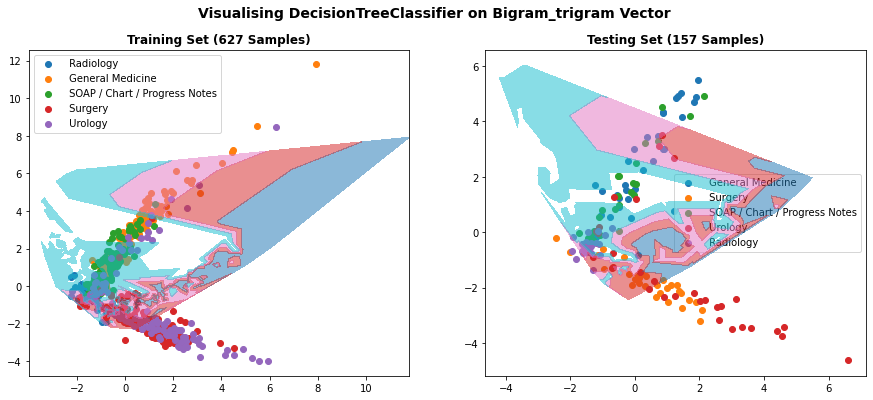

In [ ]:
best_vector, best_clf =  get_best_vector_clf(dtc_result)
vis_classification('decision-tree', vector_type = best_vector, estimator = best_clf)

##Stratified Sampling
Stratified sampling is a method of getting a representative sample from a group that relatively similar subpopulations are created.
It can be also used for obtaining exact predictions of each group’s characteristics.


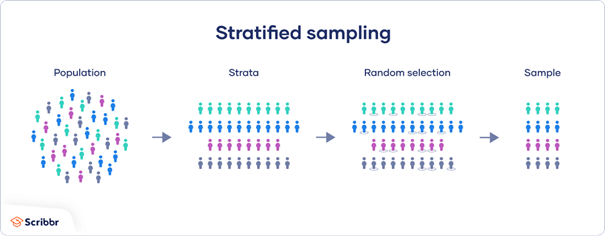

In [ ]:
# function to flatten one list
def flat_list(unflat_list):
    flatted = [item for sublist in unflat_list for item in sublist]
    return flatted

def to_list(df, attribute):
    # Select the normalised transcript column
    df_transcription = df[[attribute]]
    # To convert the attribute into list format, but it has inner list. So it cannot put into the CountVectoriser
    unflat_list_transcription = df_transcription.values.tolist()
    # Let's use back the function defined above, "flat_list", to flatten the list
    flat_list_transcription = flat_list(unflat_list_transcription)
    return flat_list_transcription
flat_list_transcription = to_list(df, 'stemmed_without_stop')

In [ ]:
n_gram_features ={'unigram':(1,1),'unigram_bigram':(1,2),'bigram':(2,2),\
       'bigram_trigram':(2,3),'trigram':(3,3)}
feature_name=[]
temp=[]
for key, values in n_gram_features.items():
    temp.append(key)
    feature_name.append(key)
temp

['unigram', 'unigram_bigram', 'bigram', 'bigram_trigram', 'trigram']

In [ ]:
def generate_n_gram_features(flat_list_transcription):
    temp=[]
    for key, values in n_gram_features.items():
        vectorizer = CountVectorizer(ngram_range=values)
        vectorizer.fit(flat_list_transcription)
        temp.append(vectorizer.transform(flat_list_transcription))
    return temp
temp = generate_n_gram_features(flat_list_transcription)

In [ ]:
dataframes = {'unigram':temp[0],
              'unigram_bigram':temp[1],
              'bigram':temp[2],
              'bigram_trigram':temp[3],
              'trigram':temp[4]}
feature_vector = [] ; feature_vector_shape = []
for key in dataframes:
    feature_vector.append(key)
    feature_vector_shape.append(dataframes[key].shape)

n_gram_df = pd.DataFrame({'N-Gram Feature Vector':feature_vector, 'Data Dimension':feature_vector_shape})
n_gram_df

,N-Gram Feature Vector,Data Dimension
0,unigram,"(1681, 11764)"
1,unigram_bigram,"(1681, 212480)"
2,bigram,"(1681, 200716)"
3,bigram_trigram,"(1681, 530398)"
4,trigram,"(1681, 329682)"


In [ ]:
dataframes['unigram']

<1681x11764 sparse matrix of type '<class 'numpy.int64'>'
	with 260500 stored elements in Compressed Sparse Row format>

###Random Forest Classifier

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')
random_state_number =8888
df_target =df[['encoded_target']].values.ravel()

In [ ]:
metrics = {
    'f1':[f1_score, 'f1_macro'],
    'precision': [precision_score, 'precision_macro'],
    'recall': [recall_score, 'recall_macro']
}

# get evaluation result

def get_performance(param_grid, base_estimator, dataframes):
    df_name_list =[]; best_estimator_list=[]; best_score_list=[]; test_predict_result_list=[];
    metric_list = [];

    for df_name, df in dataframes.items():

        X_train, X_test, y_train, y_test = train_test_split(df, df_target,stratify=df_target, test_size=0.2, shuffle =True,random_state=random_state_number)
        for _, metric_dict in metrics.items():
            sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5, scoring=metric_dict[1],random_state=random_state_number,
                                      factor=2).fit(X_train, y_train)

            best_estimator = sh.best_estimator_
            clf = best_estimator.fit(X_train, y_train)
            prediction = clf.predict(X_test)
            test_predict_result = metric_dict[0](y_test, prediction, average='macro')

            df_name_list.append(df_name) ; best_estimator_list.append(best_estimator) ;
            best_score_list.append(sh.best_score_) ;
            test_predict_result_list.append(test_predict_result) ;metric_list.append(metric_dict[1])


    model_result = pd.DataFrame({'Vector':df_name_list,'Metric':metric_list,
                               'Calibrated Estimator':best_estimator_list,
                               'Best CV Metric Score':best_score_list, 'Test Predict Metric Score': test_predict_result_list})
    return model_result

In [ ]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib
import matplotlib.pyplot as plt
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import os

def vis_classification(filename, vector_type = 'unigram', estimator = KNeighborsClassifier(n_neighbors=9)):
    pca = PCA(n_components=2)
    df1 = pca.fit_transform(dataframes[vector_type].todense())
    X_train, X_test, y_train, y_test = train_test_split(df1, df_target,stratify=df_target, test_size=0.2, random_state=random_state_number)

    # get training set
    df2 = pd.DataFrame({'pca1':X_train[:,1], 'pca2': X_train[:,0], 'y':le.inverse_transform(y_train)})
    min_1, max_1 = df2['pca1'].min(), df2['pca1'].max()
    min_2, max_2 = df2['pca2'].min(), df2['pca2'].max()

    # generate dimension reduced, but extended data
    pca1_range = np.linspace(min_1,max_1,30)
    pca2_range = np.linspace(min_2,max_2,30)

    # shuffle
    np.random.shuffle(pca1_range) ; np.random.shuffle(pca2_range)

    # to dataframe
    prediction_test = pd.DataFrame({'pca1':pca1_range, 'pca2':pca2_range})

    best_estimator = estimator

    # fit training set and predict extended data
    clf = best_estimator.fit(X_train, y_train)

    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))
    cmap = plt.cm.get_cmap('tab10', 4)
    fig.suptitle(f"Visualising {type(estimator).__name__} on {vector_type.capitalize()} Vector", fontsize=14,fontweight='bold')


    def plot_scatter(ax, predictor_set, target, title):

        # plot area classifier
        clf = best_estimator.fit(X_train, y_train)
        axs[0].tricontourf(X_train[:,0], X_train[:,1], clf.predict(X_train), levels=np.arange(-0.5, 4), zorder=10, alpha=0.3, cmap=cmap, edgecolors="k")

        axs[1].tricontourf(X_test[:,0], X_test[:,1], clf.predict(X_test), levels=np.arange(-0.5, 4), zorder=10, alpha=0.3, cmap=cmap, edgecolors="k")

        # plot scatter
        df3 = pd.DataFrame({'pca1':predictor_set[:,1], 'pca2': predictor_set[:,0], 'y':le.inverse_transform(target)})
        for y_label in df3['y'].unique():
            df_filter = df3[df3['y']==y_label]
            ax.scatter(df_filter['pca1'], df_filter['pca2'], alpha=1,label=f"{y_label}")
        ax.legend()
        ax.set_title(f'{title} ({predictor_set.shape[0]} Samples)',fontweight='bold')
    plot_scatter(axs[0], X_train, y_train, 'Training Set')
    plot_scatter(axs[1], X_test, y_test, 'Testing Set')
    #axs[0].sharey(axs[1])
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/DSCP/plots_stratify/'+filename+'.png', bbox_inches='tight')
    return plt.show()


In [ ]:
param_grid = {'max_depth': [None,30,32,35,37,38,39,40],'min_samples_split': [2,150,170,180,190,200]}
base_estimator = RandomForestClassifier(random_state=random_state_number)
rfc_result = get_performance(param_grid, base_estimator, dataframes)
rfc_result

,Vector,Metric,Calibrated Estimator,Best CV Metric Score,Test Predict Metric Score
0,unigram,f1_macro,"(DecisionTreeClassifier(max_depth=37, max_feat...",0.697433,0.712900
1,unigram,precision_macro,"(DecisionTreeClassifier(max_depth=37, max_feat...",0.825364,0.852491
2,unigram,recall_macro,"(DecisionTreeClassifier(max_depth=37, max_feat...",0.695891,0.716666
3,unigram_bigram,f1_macro,"(DecisionTreeClassifier(max_features='auto', r...",0.658035,0.661067
4,unigram_bigram,precision_macro,"(DecisionTreeClassifier(max_depth=37, max_feat...",0.751295,0.621340
5,unigram_bigram,recall_macro,"(DecisionTreeClassifier(max_features='auto', r...",0.661361,0.678498
6,bigram,f1_macro,"(DecisionTreeClassifier(max_features='auto', r...",0.588778,0.650388
7,bigram,precision_macro,"(DecisionTreeClassifier(max_features='auto', r...",0.676334,0.645678
8,bigram,recall_macro,"(DecisionTreeClassifier(max_features='auto', r...",0.600839,0.674942
9,bigram_trigram,f1_macro,"(DecisionTreeClassifier(max_features='auto', r...",0.577285,0.649485


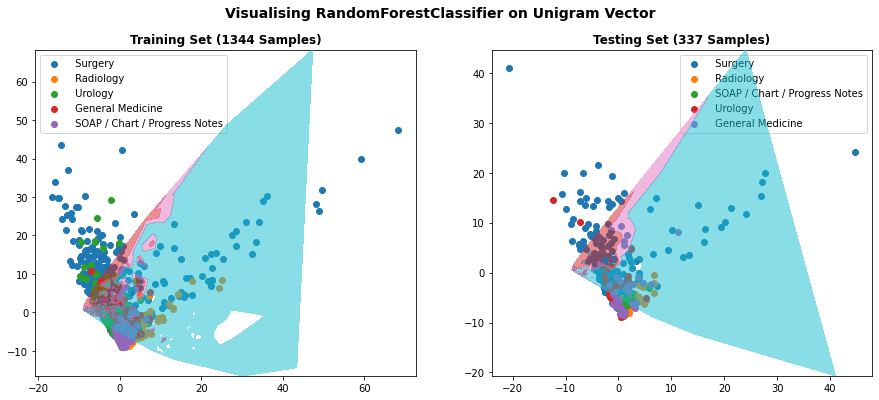

In [ ]:
def get_best_vector_clf(knn_result):

    temp = knn_result[knn_result['Metric'] =='f1_macro']
    temp2 = temp.iloc[temp['Best CV Metric Score'].idxmax()].to_frame().T
    best_vector = temp2['Vector'].values[0]
    best_clf = temp2['Calibrated Estimator'].values[0]

    return best_vector, best_clf

best_vector, best_clf =  get_best_vector_clf(rfc_result)
vis_classification('rfc',vector_type = best_vector, estimator = best_clf)

In [ ]:
df_temp = rfc_result[rfc_result['Metric'] =='f1_macro']
# df_temp['Calibrated Estimator']
vector_rfc = df_temp[['Vector','Calibrated Estimator']].set_index('Vector').to_dict()['Calibrated Estimator']
vector_rfc

{'unigram': RandomForestClassifier(max_depth=37, random_state=8888),
 'unigram_bigram': RandomForestClassifier(random_state=8888),
 'bigram': RandomForestClassifier(random_state=8888),
 'bigram_trigram': RandomForestClassifier(random_state=8888),
 'trigram': RandomForestClassifier(min_samples_split=170, random_state=8888)}

In [ ]:
supported_columns_dict = {}
for df_name, df in dataframes.items():
    X_train, X_test, y_train, y_test = train_test_split(dataframes[df_name], df_target,stratify=df_target, test_size=0.2, random_state=random_state_number)

    selector = SelectFromModel(estimator=vector_rfc[df_name]).fit(X_train, y_train)

    filter_columns = selector.get_support()
    dataframes[df_name] = dataframes[df_name][:, filter_columns]

shape_dim = [] ; df_names = []
for df_name, df in dataframes.items():
    shape_dim.append(df.shape)
    df_names.append(df_name)
n_gram_df_dim = pd.DataFrame({'N-Gram Feature Vector':df_names, 'Data Dimension':shape_dim})
n_gram_df_dim

,N-Gram Feature Vector,Data Dimension
0,unigram,"(1681, 1746)"
1,unigram_bigram,"(1681, 13875)"
2,bigram,"(1681, 15777)"
3,bigram_trigram,"(1681, 19453)"
4,trigram,"(1681, 11386)"


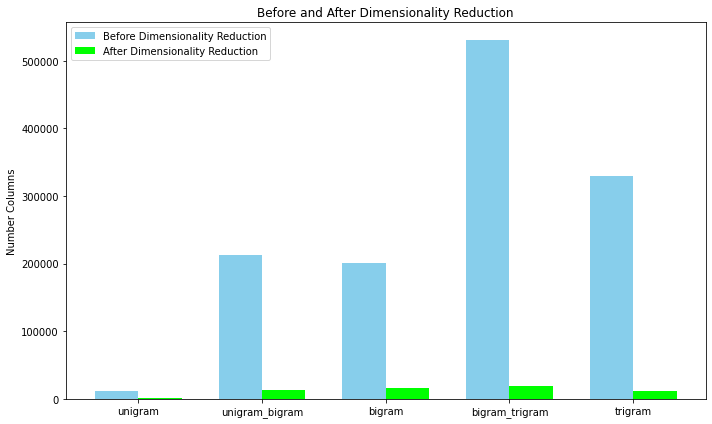

In [ ]:
labels = n_gram_df_dim['N-Gram Feature Vector'].values
b4 = [shape[1] for shape in n_gram_df['Data Dimension'].values]
af = [shape[1] for shape in n_gram_df_dim['Data Dimension'].values]

x = np.arange(len(labels))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, b4, width, label='Before Dimensionality Reduction', color='skyblue')
rects2 = ax.bar(x + width/2, af, width, label='After Dimensionality Reduction', color='lime')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number Columns')
ax.set_title('Before and After Dimensionality Reduction')
plt.xticks(x, labels)
plt.legend()
fig.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/DSCP/plots_stratify/before_and_after_dimensionality_reduction.png', bbox_inches='tight')
plt.show()

### K-Nearest Neighbor (KNN) Classification

In [ ]:
param_grid = {'n_neighbors': [5,7,9,11,13,15,17,19,21]}
base_estimator = KNeighborsClassifier()
knn_result = get_performance(param_grid, base_estimator, dataframes)
knn_result

,Vector,Metric,Calibrated Estimator,Best CV Metric Score,Test Predict Metric Score
0,unigram,f1_macro,KNeighborsClassifier(),0.690621,0.691673
1,unigram,precision_macro,KNeighborsClassifier(),0.803409,0.771828
2,unigram,recall_macro,KNeighborsClassifier(),0.645390,0.658512
3,unigram_bigram,f1_macro,KNeighborsClassifier(),0.633380,0.599476
4,unigram_bigram,precision_macro,KNeighborsClassifier(),0.797136,0.717603
5,unigram_bigram,recall_macro,KNeighborsClassifier(),0.578320,0.580875
6,bigram,f1_macro,KNeighborsClassifier(),0.307673,0.249141
7,bigram,precision_macro,KNeighborsClassifier(),0.695268,0.314967
8,bigram,recall_macro,KNeighborsClassifier(),0.298588,0.277268
9,bigram_trigram,f1_macro,KNeighborsClassifier(n_neighbors=17),0.190144,0.169670


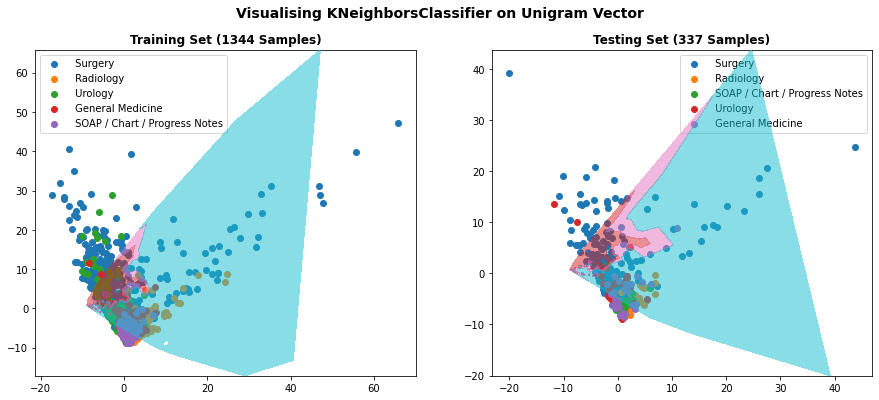

In [ ]:
best_vector, best_clf =  get_best_vector_clf(knn_result)
vis_classification('knn', vector_type = best_vector, estimator = best_clf)

### Decision Tree

In [ ]:
param_grid = {'max_depth': [None,4,6,7,8,30,32,35],'min_samples_split': [2,3,4,5,35,10,16,20]}
base_estimator = DecisionTreeClassifier(random_state=random_state_number)
dtc_result = get_performance(param_grid, base_estimator, dataframes)
dtc_result

,Vector,Metric,Calibrated Estimator,Best CV Metric Score,Test Predict Metric Score
0,unigram,f1_macro,"DecisionTreeClassifier(min_samples_split=5, ra...",0.687908,0.761136
1,unigram,precision_macro,"DecisionTreeClassifier(max_depth=7, min_sample...",0.728090,0.827733
2,unigram,recall_macro,"DecisionTreeClassifier(min_samples_split=5, ra...",0.683962,0.766778
3,unigram_bigram,f1_macro,"DecisionTreeClassifier(min_samples_split=4, ra...",0.697640,0.790585
4,unigram_bigram,precision_macro,"DecisionTreeClassifier(max_depth=8, min_sample...",0.739765,0.801499
5,unigram_bigram,recall_macro,"DecisionTreeClassifier(max_depth=35, min_sampl...",0.698787,0.795119
6,bigram,f1_macro,"DecisionTreeClassifier(max_depth=35, min_sampl...",0.611894,0.667690
7,bigram,precision_macro,"DecisionTreeClassifier(max_depth=32, min_sampl...",0.641706,0.711477
8,bigram,recall_macro,"DecisionTreeClassifier(max_depth=7, min_sample...",0.581327,0.597928
9,bigram_trigram,f1_macro,"DecisionTreeClassifier(max_depth=35, min_sampl...",0.622429,0.743512


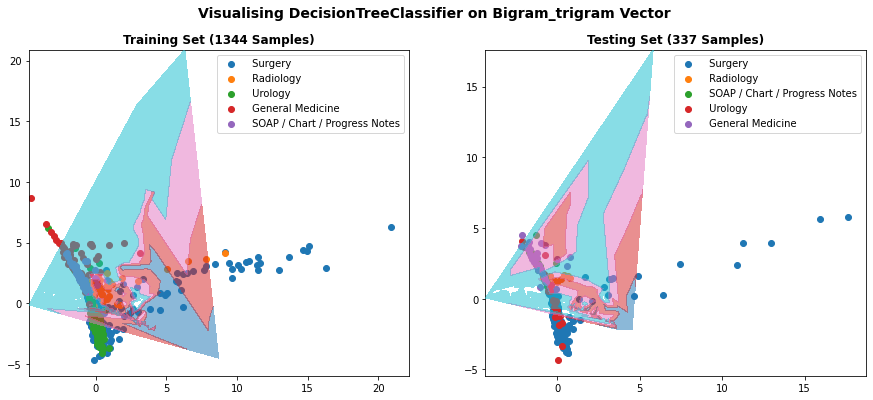

In [ ]:
best_vector, best_clf =  get_best_vector_clf(dtc_result)
vis_classification('decision-tree',vector_type = best_vector, estimator = best_clf)

#Evaluation

Recall metrics relate to positive samples, but neglect negative samples, so they are not evaluated alone, precision must also be considered. For this reason, the F1 score will be taken into account.

In this project, high performance of the model was not expected due to the large number of duplicates in the data and the bias in the data distribution, but still the result was above the expectation. The balanced distribution and the elimination of duplicates in the Train set had a positive effect on the result.

  We handled the unbalanced dataset using two different techniques: undersampled and stratified.

##Undersampled Dataset




The most sufficient model is Random Forest with highest F1-score which is 0.86. In contrast to, the most unsufficient model is KNN with lowest F1 score=0.58.

In F1 score of Decision Tree model is close to Random Forest Model with 0.75.

In get_best_result() function , the most appropriate model is selected, clearly it is Random Forest.
However, considering the running time of Random Forest, Decision Tree model can be assessable for fast and average results.

In [ ]:
df_result = pd.concat([knn_result,
                      dtc_result,
                      rfc_result
                      ]
                     ).reset_index(drop=True)

df_result.groupby(['Metric']).max()

,Vector,Best CV Metric Score,Test Predict Metric Score
Metric,,,
f1_macro,unigram_bigram,0.775593,0.841753
precision_macro,unigram_bigram,0.807513,0.854276
recall_macro,unigram_bigram,0.792469,0.844343


In [ ]:
def get_best_result(df_result, metric_score):
    df_result_t = df_result[df_result.Metric== 'precision_macro']
    precision_macro_df = df_result_t.loc[df_result_t[metric_score].idxmax()].to_frame().T

    df_result_t = df_result[df_result.Metric== 'recall_macro']
    recall_macro_df = df_result_t.loc[df_result_t[metric_score].idxmax()].to_frame().T

    df_result_t = df_result[df_result.Metric== 'f1_macro']
    f1_macro_df = df_result_t.loc[df_result_t[metric_score].idxmax()].to_frame().T

    return pd.concat([precision_macro_df,recall_macro_df,f1_macro_df])

In [ ]:
best_cv_result = get_best_result(df_result, 'Best CV Metric Score')
display(best_cv_result)
temp = best_cv_result[best_cv_result['Metric'] == 'f1_macro']
best_clf = temp['Calibrated Estimator'].values[0]
best_vector = temp['Vector'].values[0]

,Vector,Metric,Calibrated Estimator,Best CV Metric Score,Test Predict Metric Score
34,unigram_bigram,precision_macro,"(DecisionTreeClassifier(max_depth=39, max_feat...",0.807513,0.836147
32,unigram,recall_macro,"(DecisionTreeClassifier(max_depth=30, max_feat...",0.792469,0.844343
30,unigram,f1_macro,"(DecisionTreeClassifier(max_depth=30, max_feat...",0.775593,0.841753


In [ ]:
get_best_result(df_result, 'Test Predict Metric Score')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataframes[best_vector], df_target, test_size=0.2, \
                                                    random_state=random_state_number)
clf = best_clf.fit(X_train, y_train)
y_test_pred= clf.predict(X_test)
target_names = [' Surgery', ' Radiology',' General Medicine',' Urology',' SOAP / Chart / Progress Notes']
print(classification_report(y_test,y_test_pred,target_names=target_names))

                                precision    recall  f1-score   support

                       Surgery       0.75      0.88      0.81        34
                     Radiology       0.90      0.96      0.93        28
              General Medicine       0.79      0.74      0.77        31
                       Urology       0.94      0.97      0.95        32
 SOAP / Chart / Progress Notes       0.96      0.75      0.84        32

                      accuracy                           0.86       157
                     macro avg       0.87      0.86      0.86       157
                  weighted avg       0.87      0.86      0.86       157



In [ ]:
sample_predict = pd.DataFrame({'Actual Y Test': le.inverse_transform(y_test),'Best Prediction':le.inverse_transform(y_test_pred)})
sample_predict.head(20)

,Actual Y Test,Best Prediction
0,General Medicine,General Medicine
1,Surgery,Surgery
2,SOAP / Chart / Progress Notes,General Medicine
3,Urology,Urology
4,Urology,Urology
5,Radiology,Radiology
6,General Medicine,General Medicine
7,Radiology,Radiology
8,Surgery,Surgery
9,Surgery,Surgery


##Stratified Sampling

In stratified dataset, the most sufficient model is Random Forest with 0.87 F1 score, it is grater than in undersampled dataset.
The lowest F1 score is in the KNN model  as in the KNN model where undersampled dataset.
In summary for stratified dataset, F1 score is 0.87, it is slightly greater than undersampled data. Their results are almost the same.



In [ ]:
df_result = pd.concat([knn_result,
                      dtc_result,
                      rfc_result
                      ]
                     ).reset_index(drop=True)

df_result.groupby(['Metric']).max()

,Vector,Best CV Metric Score,Test Predict Metric Score
Metric,,,
f1_macro,unigram_bigram,0.697640,0.790585
precision_macro,unigram_bigram,0.825364,0.852491
recall_macro,unigram_bigram,0.698787,0.795119


In [ ]:
def get_best_result(df_result, metric_score):
    df_result_t = df_result[df_result.Metric== 'precision_macro']
    precision_macro_df = df_result_t.loc[df_result_t[metric_score].idxmax()].to_frame().T

    df_result_t = df_result[df_result.Metric== 'recall_macro']
    recall_macro_df = df_result_t.loc[df_result_t[metric_score].idxmax()].to_frame().T

    df_result_t = df_result[df_result.Metric== 'f1_macro']
    f1_macro_df = df_result_t.loc[df_result_t[metric_score].idxmax()].to_frame().T

    return pd.concat([precision_macro_df,recall_macro_df,f1_macro_df])

In [ ]:
best_cv_result = get_best_result(df_result, 'Best CV Metric Score')
display(best_cv_result)
temp = best_cv_result[best_cv_result['Metric'] == 'f1_macro']
best_clf = temp['Calibrated Estimator'].values[0]
best_vector = temp['Vector'].values[0]

,Vector,Metric,Calibrated Estimator,Best CV Metric Score,Test Predict Metric Score
31,unigram,precision_macro,"(DecisionTreeClassifier(max_depth=37, max_feat...",0.825364,0.852491
20,unigram_bigram,recall_macro,"DecisionTreeClassifier(max_depth=35, min_sampl...",0.698787,0.795119
18,unigram_bigram,f1_macro,"DecisionTreeClassifier(min_samples_split=4, ra...",0.69764,0.790585


In [ ]:
get_best_result(df_result, 'Test Predict Metric Score')

,Vector,Metric,Calibrated Estimator,Best CV Metric Score,Test Predict Metric Score
31,unigram,precision_macro,"(DecisionTreeClassifier(max_depth=37, max_feat...",0.825364,0.852491
20,unigram_bigram,recall_macro,"DecisionTreeClassifier(max_depth=35, min_sampl...",0.698787,0.795119
18,unigram_bigram,f1_macro,"DecisionTreeClassifier(min_samples_split=4, ra...",0.69764,0.790585


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataframes[best_vector], df_target,stratify=df_target, test_size=0.2, \
                                                    random_state=random_state_number)
clf = best_clf.fit(X_train, y_train)
y_test_pred= clf.predict(X_test)
target_names = [' Surgery', ' Radiology',' General Medicine',' Urology',' SOAP / Chart / Progress Notes']
print(classification_report(y_test,y_test_pred,target_names=target_names))

                                precision    recall  f1-score   support

                       Surgery       0.76      0.81      0.78        31
                     Radiology       0.76      0.90      0.83        50
              General Medicine       0.62      0.62      0.62        29
                       Urology       0.97      0.94      0.95       196
 SOAP / Chart / Progress Notes       0.85      0.71      0.77        31

                      accuracy                           0.87       337
                     macro avg       0.79      0.80      0.79       337
                  weighted avg       0.88      0.87      0.87       337



In [ ]:
sample_predict = pd.DataFrame({'Actual Y Test': le.inverse_transform(y_test),'Best Prediction':le.inverse_transform(y_test_pred)})
sample_predict.head(20)

,Actual Y Test,Best Prediction
0,Surgery,Surgery
1,Radiology,Radiology
2,Surgery,Surgery
3,Surgery,Surgery
4,Surgery,Surgery
5,SOAP / Chart / Progress Notes,Radiology
6,Surgery,Surgery
7,Surgery,Surgery
8,Surgery,Surgery
9,Surgery,Surgery


##Conclusion
In conclusion, In this project, the most succesful model is Random Forest on unigrams with 0.87 F1 score. Stratified and Undersampled techniques, both works sufficiently, but stratified data is slightly succesful than undersampled.

This model correctly answers 87 out of 100 questions. An incredible result when considering the negativities in the dataset!

Note: We would like to visualize confusion matrix and go into the details but, running models were taking more than 3hours. That is why we could not perform over and over again.

## References<a class="anchor" id="references"></a>
**[1]** Boyle, T. (2018). *Medical Transcriptions*. https://www.kaggle.com/datasets/tboyle10/medicaltranscriptions?select=mtsamples.csv

**[2]** Brownlee, J. (2020). *Train-Test Split for Evaluating Machine Learning Algorithms*. https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

**[3]** JavaTpoint. *Decision Tree Classification Algorithm*. https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm

**[4]** datacamp. (2018). *Understanding Random Forests Classifiers in Python Tutorial*. https://www.datacamp.com/tutorial/random-forests-classifier-python

**[5]** datacamp. (2018). *Decision Tree Classification in Python Tutorial*. https://www.datacamp.com/tutorial/decision-tree-classification-python

**[6]** Hvilshøj, F. (2022). *An Introduction to Balanced and Imbalanced Datasets in Machine Learning*. https://encord.com/blog/an-introduction-to-balanced-and-imbalanced-datasets-in-machine-learning

**[7]** Bornstein MH, Jager J, Putnick DL. Sampling in Developmental Science: Situations, Shortcomings, Solutions, and Standards. Dev Rev. 2013 Dec;33(4):357-370. doi: 10.1016/j.dr.2013.08.003. PMID: 25580049; PMCID: PMC4286359.

**[8]** Thomas, L. (2022).* Stratified Sampling | Definition, Guide & Examples*. https://www.scribbr.com/methodology/stratified-sampling/

**[9]** Kuo, C. (2018). *Using Over-Sampling Techniques for Extremely Imbalanced Data*. https://medium.com/dataman-in-ai/sampling-techniques-for-extremely-imbalanced-data-part-ii-over-sampling-d61b43bc4879

**[10]** JavaTpoint. *Precision and Recall in Machine Learning*. https://www.javatpoint.com/precision-and-recall-in-machine-learning

**[11]** LT, Zeya. (2021). *Essential Things You Need to Know About F1-Score*. https://towardsdatascience.com/essential-things-you-need-to-know-about-f1-score-dbd973bf1a3#4c6c


**Disclaimer!** <font color='grey'>This notebook was prepared by Meltem Kaya and Safiye Tufekci as a term project for the *BBM467 - Data Intensive Applications* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8).
</font>